In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

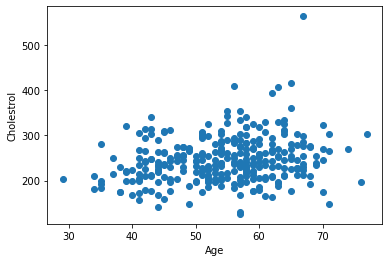

In [10]:
plt.scatter(df.age , df.chol)
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

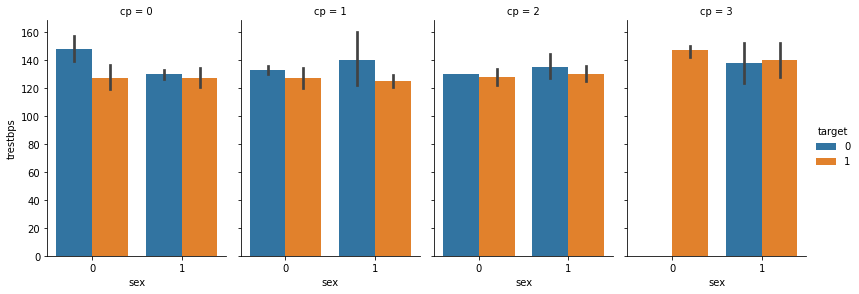

In [11]:
g = sns.catplot(x="sex", y="trestbps",
                hue="target", col="cp",
                data=df, kind="bar",
                height=4, aspect=.7)

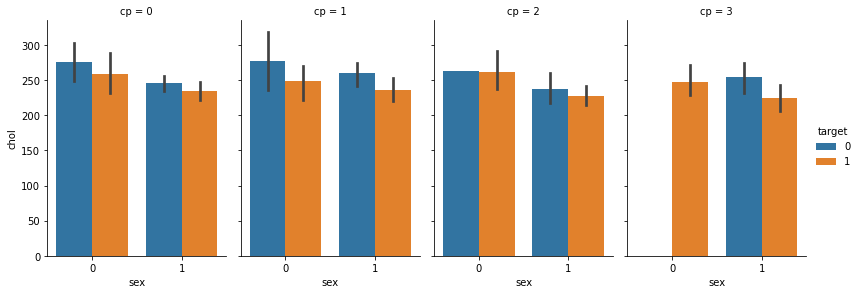

In [12]:
h = sns.catplot(x="sex", y="chol",
                hue="target", col="cp",
                data=df, kind="bar",
                height=4, aspect=.7)

In [13]:
df['slope'].unique()

array([0, 2, 1])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df.drop('target' , axis = 1 ) , df['target'] , test_size=0.2, random_state=42)

In [15]:
from catboost import CatBoostClassifier

In [19]:
model = CatBoostClassifier(loss_function='Logloss' , iterations=1000)

grid = {'learning_rate': list(np.arange(0 , 1 , 0.01)),
        'depth': list(np.arange(3 , 7)),
        'l2_leaf_reg':list(np.arange(1 , 50 , 5))}

grid_search_result = model.grid_search(grid,
                                       X=x_train, 
                                       y=y_train)


bestTest = 0.4478372087
bestIteration = 306

0:	loss: 0.4478372	best: 0.4478372 (0)	total: 489ms	remaining: 32m 36s

bestTest = 0.4347260262
bestIteration = 148

1:	loss: 0.4347260	best: 0.4347260 (1)	total: 981ms	remaining: 32m 40s

bestTest = 0.4432049349
bestIteration = 120

2:	loss: 0.4432049	best: 0.4347260 (1)	total: 1.45s	remaining: 32m 17s

bestTest = 0.4439682493
bestIteration = 72

3:	loss: 0.4439682	best: 0.4347260 (1)	total: 1.93s	remaining: 32m 9s

bestTest = 0.4173398806
bestIteration = 74

4:	loss: 0.4173399	best: 0.4173399 (4)	total: 2.39s	remaining: 31m 49s

bestTest = 0.4550524521
bestIteration = 87

5:	loss: 0.4550525	best: 0.4173399 (4)	total: 2.91s	remaining: 32m 18s

bestTest = 0.4309144017
bestIteration = 34

6:	loss: 0.4309144	best: 0.4173399 (4)	total: 3.35s	remaining: 31m 51s

bestTest = 0.4417950732
bestIteration = 31

7:	loss: 0.4417951	best: 0.4173399 (4)	total: 3.8s	remaining: 31m 37s

bestTest = 0.4326019915
bestIteration = 36

8:	loss: 0.4326020	best: 0


bestTest = 0.3933622858
bestIteration = 5

71:	loss: 0.3933623	best: 0.3851846 (65)	total: 33.2s	remaining: 30m 11s

bestTest = 0.3934956351
bestIteration = 5

72:	loss: 0.3934956	best: 0.3851846 (65)	total: 33.7s	remaining: 30m 10s

bestTest = 0.3936551064
bestIteration = 5

73:	loss: 0.3936551	best: 0.3851846 (65)	total: 34.2s	remaining: 30m 12s

bestTest = 0.3938408846
bestIteration = 5

74:	loss: 0.3938409	best: 0.3851846 (65)	total: 34.6s	remaining: 30m 11s

bestTest = 0.3940531801
bestIteration = 5

75:	loss: 0.3940532	best: 0.3851846 (65)	total: 35.1s	remaining: 30m 11s

bestTest = 0.3942922251
bestIteration = 5

76:	loss: 0.3942922	best: 0.3851846 (65)	total: 35.5s	remaining: 30m 8s

bestTest = 0.394558271
bestIteration = 5

77:	loss: 0.3945583	best: 0.3851846 (65)	total: 36s	remaining: 30m 7s

bestTest = 0.3948515877
bestIteration = 5

78:	loss: 0.3948516	best: 0.3851846 (65)	total: 36.4s	remaining: 30m 7s

bestTest = 0.3781629192
bestIteration = 4

79:	loss: 0.3781629	best: 


bestTest = 0.4290100192
bestIteration = 5

141:	loss: 0.4290100	best: 0.3781629 (79)	total: 1m 5s	remaining: 29m 51s

bestTest = 0.4292399759
bestIteration = 5

142:	loss: 0.4292400	best: 0.3781629 (79)	total: 1m 6s	remaining: 29m 50s

bestTest = 0.4295729392
bestIteration = 5

143:	loss: 0.4295729	best: 0.3781629 (79)	total: 1m 6s	remaining: 29m 49s

bestTest = 0.430004486
bestIteration = 5

144:	loss: 0.4300045	best: 0.3781629 (79)	total: 1m 7s	remaining: 29m 47s

bestTest = 0.4279957456
bestIteration = 9

145:	loss: 0.4279957	best: 0.3781629 (79)	total: 1m 7s	remaining: 29m 46s

bestTest = 0.4490356128
bestIteration = 10

146:	loss: 0.4490356	best: 0.3781629 (79)	total: 1m 8s	remaining: 29m 45s

bestTest = 0.4498645102
bestIteration = 10

147:	loss: 0.4498645	best: 0.3781629 (79)	total: 1m 8s	remaining: 29m 44s

bestTest = 0.4298028177
bestIteration = 5

148:	loss: 0.4298028	best: 0.3781629 (79)	total: 1m 9s	remaining: 29m 46s

bestTest = 0.4520735034
bestIteration = 3

149:	loss: 


bestTest = 0.4445035503
bestIteration = 29

210:	loss: 0.4445036	best: 0.3781629 (79)	total: 1m 37s	remaining: 29m 5s

bestTest = 0.4273349304
bestIteration = 30

211:	loss: 0.4273349	best: 0.3781629 (79)	total: 1m 37s	remaining: 29m 4s

bestTest = 0.4467727583
bestIteration = 29

212:	loss: 0.4467728	best: 0.3781629 (79)	total: 1m 38s	remaining: 29m 5s

bestTest = 0.4485569452
bestIteration = 30

213:	loss: 0.4485569	best: 0.3781629 (79)	total: 1m 38s	remaining: 29m 5s

bestTest = 0.4368778395
bestIteration = 30

214:	loss: 0.4368778	best: 0.3781629 (79)	total: 1m 39s	remaining: 29m 4s

bestTest = 0.4316070149
bestIteration = 30

215:	loss: 0.4316070	best: 0.3781629 (79)	total: 1m 39s	remaining: 29m 4s

bestTest = 0.4245740881
bestIteration = 27

216:	loss: 0.4245741	best: 0.3781629 (79)	total: 1m 40s	remaining: 29m 4s

bestTest = 0.4270645478
bestIteration = 12

217:	loss: 0.4270645	best: 0.3781629 (79)	total: 1m 40s	remaining: 29m 3s

bestTest = 0.4238546418
bestIteration = 14

218


bestTest = 0.4196675598
bestIteration = 6

280:	loss: 0.4196676	best: 0.3781629 (79)	total: 2m 9s	remaining: 28m 36s

bestTest = 0.4209563542
bestIteration = 6

281:	loss: 0.4209564	best: 0.3781629 (79)	total: 2m 10s	remaining: 28m 35s

bestTest = 0.4222876413
bestIteration = 6

282:	loss: 0.4222876	best: 0.3781629 (79)	total: 2m 10s	remaining: 28m 34s

bestTest = 0.4236612723
bestIteration = 6

283:	loss: 0.4236613	best: 0.3781629 (79)	total: 2m 11s	remaining: 28m 35s

bestTest = 0.4250771574
bestIteration = 6

284:	loss: 0.4250772	best: 0.3781629 (79)	total: 2m 11s	remaining: 28m 34s

bestTest = 0.4265352334
bestIteration = 6

285:	loss: 0.4265352	best: 0.3781629 (79)	total: 2m 11s	remaining: 28m 33s

bestTest = 0.4280354702
bestIteration = 6

286:	loss: 0.4280355	best: 0.3781629 (79)	total: 2m 12s	remaining: 28m 34s

bestTest = 0.4295778698
bestIteration = 6

287:	loss: 0.4295779	best: 0.3781629 (79)	total: 2m 13s	remaining: 28m 34s

bestTest = 0.4311624751
bestIteration = 6

288:	


bestTest = 0.4159498599
bestIteration = 5

349:	loss: 0.4159499	best: 0.3781629 (79)	total: 2m 41s	remaining: 28m 1s

bestTest = 0.4150904098
bestIteration = 5

350:	loss: 0.4150904	best: 0.3781629 (79)	total: 2m 41s	remaining: 28m 1s

bestTest = 0.4142668867
bestIteration = 5

351:	loss: 0.4142669	best: 0.3781629 (79)	total: 2m 42s	remaining: 28m 1s

bestTest = 0.4134768761
bestIteration = 5

352:	loss: 0.4134769	best: 0.3781629 (79)	total: 2m 42s	remaining: 28m

bestTest = 0.4127181062
bestIteration = 5

353:	loss: 0.4127181	best: 0.3781629 (79)	total: 2m 43s	remaining: 27m 59s

bestTest = 0.4119884364
bestIteration = 5

354:	loss: 0.4119884	best: 0.3781629 (79)	total: 2m 43s	remaining: 27m 59s

bestTest = 0.4112858505
bestIteration = 5

355:	loss: 0.4112859	best: 0.3781629 (79)	total: 2m 43s	remaining: 27m 58s

bestTest = 0.4106084469
bestIteration = 5

356:	loss: 0.4106084	best: 0.3781629 (79)	total: 2m 44s	remaining: 27m 58s

bestTest = 0.4099544494
bestIteration = 5

357:	loss: 


bestTest = 0.4281627161
bestIteration = 22

418:	loss: 0.4281627	best: 0.3781629 (79)	total: 3m 12s	remaining: 27m 29s

bestTest = 0.4304800556
bestIteration = 22

419:	loss: 0.4304801	best: 0.3781629 (79)	total: 3m 13s	remaining: 27m 28s

bestTest = 0.4306378294
bestIteration = 12

420:	loss: 0.4306378	best: 0.3781629 (79)	total: 3m 13s	remaining: 27m 27s

bestTest = 0.428774374
bestIteration = 21

421:	loss: 0.4287744	best: 0.3781629 (79)	total: 3m 14s	remaining: 27m 27s

bestTest = 0.4348707761
bestIteration = 9

422:	loss: 0.4348708	best: 0.3781629 (79)	total: 3m 14s	remaining: 27m 26s

bestTest = 0.4432528451
bestIteration = 12

423:	loss: 0.4432528	best: 0.3781629 (79)	total: 3m 15s	remaining: 27m 26s

bestTest = 0.4302631919
bestIteration = 9

424:	loss: 0.4302632	best: 0.3781629 (79)	total: 3m 15s	remaining: 27m 25s

bestTest = 0.4093061839
bestIteration = 12

425:	loss: 0.4093062	best: 0.3781629 (79)	total: 3m 16s	remaining: 27m 25s

bestTest = 0.4119327984
bestIteration = 12


bestTest = 0.4211258281
bestIteration = 10

487:	loss: 0.4211258	best: 0.3663350 (452)	total: 3m 44s	remaining: 26m 56s

bestTest = 0.4220119791
bestIteration = 10

488:	loss: 0.4220120	best: 0.3663350 (452)	total: 3m 45s	remaining: 26m 55s

bestTest = 0.4250490994
bestIteration = 10

489:	loss: 0.4250491	best: 0.3663350 (452)	total: 3m 45s	remaining: 26m 54s

bestTest = 0.431007652
bestIteration = 1

490:	loss: 0.4310077	best: 0.3663350 (452)	total: 3m 45s	remaining: 26m 54s

bestTest = 0.4206307577
bestIteration = 13

491:	loss: 0.4206308	best: 0.3663350 (452)	total: 3m 46s	remaining: 26m 54s

bestTest = 0.4301839004
bestIteration = 1

492:	loss: 0.4301839	best: 0.3663350 (452)	total: 3m 46s	remaining: 26m 54s

bestTest = 0.4298072075
bestIteration = 1

493:	loss: 0.4298072	best: 0.3663350 (452)	total: 3m 47s	remaining: 26m 53s

bestTest = 0.4294533942
bestIteration = 1

494:	loss: 0.4294534	best: 0.3663350 (452)	total: 3m 47s	remaining: 26m 53s

bestTest = 0.4454088348
bestIteratio


bestTest = 0.3843692756
bestIteration = 9

556:	loss: 0.3843693	best: 0.3648558 (553)	total: 4m 16s	remaining: 26m 25s

bestTest = 0.3844433764
bestIteration = 9

557:	loss: 0.3844434	best: 0.3648558 (553)	total: 4m 17s	remaining: 26m 25s

bestTest = 0.3845577162
bestIteration = 9

558:	loss: 0.3845577	best: 0.3648558 (553)	total: 4m 17s	remaining: 26m 24s

bestTest = 0.3942328143
bestIteration = 6

559:	loss: 0.3942328	best: 0.3648558 (553)	total: 4m 17s	remaining: 26m 24s

bestTest = 0.3932738049
bestIteration = 6

560:	loss: 0.3932738	best: 0.3648558 (553)	total: 4m 18s	remaining: 26m 24s

bestTest = 0.3892804962
bestIteration = 8

561:	loss: 0.3892805	best: 0.3648558 (553)	total: 4m 18s	remaining: 26m 23s

bestTest = 0.3883369298
bestIteration = 8

562:	loss: 0.3883369	best: 0.3648558 (553)	total: 4m 19s	remaining: 26m 23s

bestTest = 0.4308109613
bestIteration = 5

563:	loss: 0.4308110	best: 0.3648558 (553)	total: 4m 19s	remaining: 26m 22s

bestTest = 0.4294117469
bestIteration =


bestTest = 0.435618889
bestIteration = 5

625:	loss: 0.4356189	best: 0.3648558 (553)	total: 4m 48s	remaining: 25m 56s

bestTest = 0.4275807733
bestIteration = 20

626:	loss: 0.4275808	best: 0.3648558 (553)	total: 4m 49s	remaining: 25m 55s

bestTest = 0.4303256468
bestIteration = 5

627:	loss: 0.4303256	best: 0.3648558 (553)	total: 4m 49s	remaining: 25m 55s

bestTest = 0.4278931511
bestIteration = 5

628:	loss: 0.4278932	best: 0.3648558 (553)	total: 4m 50s	remaining: 25m 54s

bestTest = 0.4255934184
bestIteration = 5

629:	loss: 0.4255934	best: 0.3648558 (553)	total: 4m 50s	remaining: 25m 54s

bestTest = 0.4234195358
bestIteration = 5

630:	loss: 0.4234195	best: 0.3648558 (553)	total: 4m 51s	remaining: 25m 54s

bestTest = 0.4213649786
bestIteration = 5

631:	loss: 0.4213650	best: 0.3648558 (553)	total: 4m 51s	remaining: 25m 53s

bestTest = 0.4194236113
bestIteration = 5

632:	loss: 0.4194236	best: 0.3648558 (553)	total: 4m 52s	remaining: 25m 53s

bestTest = 0.4175896487
bestIteration =


bestTest = 0.4493657254
bestIteration = 303

694:	loss: 0.4493657	best: 0.3648558 (553)	total: 5m 20s	remaining: 25m 25s

bestTest = 0.4570176787
bestIteration = 161

695:	loss: 0.4570177	best: 0.3648558 (553)	total: 5m 21s	remaining: 25m 24s

bestTest = 0.4448486407
bestIteration = 136

696:	loss: 0.4448486	best: 0.3648558 (553)	total: 5m 21s	remaining: 25m 24s

bestTest = 0.4510133778
bestIteration = 109

697:	loss: 0.4510134	best: 0.3648558 (553)	total: 5m 22s	remaining: 25m 24s

bestTest = 0.4546058403
bestIteration = 92

698:	loss: 0.4546058	best: 0.3648558 (553)	total: 5m 22s	remaining: 25m 23s

bestTest = 0.450306399
bestIteration = 79

699:	loss: 0.4503064	best: 0.3648558 (553)	total: 5m 23s	remaining: 25m 23s

bestTest = 0.4554619872
bestIteration = 69

700:	loss: 0.4554620	best: 0.3648558 (553)	total: 5m 23s	remaining: 25m 22s

bestTest = 0.4514077345
bestIteration = 60

701:	loss: 0.4514077	best: 0.3648558 (553)	total: 5m 24s	remaining: 25m 22s

bestTest = 0.4572172864
best


bestTest = 0.3899655373
bestIteration = 6

763:	loss: 0.3899655	best: 0.3648558 (553)	total: 5m 52s	remaining: 24m 55s

bestTest = 0.3856089584
bestIteration = 7

764:	loss: 0.3856090	best: 0.3648558 (553)	total: 5m 53s	remaining: 24m 54s

bestTest = 0.3846443501
bestIteration = 7

765:	loss: 0.3846444	best: 0.3648558 (553)	total: 5m 53s	remaining: 24m 53s

bestTest = 0.3837011966
bestIteration = 7

766:	loss: 0.3837012	best: 0.3648558 (553)	total: 5m 54s	remaining: 24m 53s

bestTest = 0.3827785357
bestIteration = 7

767:	loss: 0.3827785	best: 0.3648558 (553)	total: 5m 54s	remaining: 24m 52s

bestTest = 0.3818754467
bestIteration = 7

768:	loss: 0.3818754	best: 0.3648558 (553)	total: 5m 55s	remaining: 24m 52s

bestTest = 0.3809910498
bestIteration = 7

769:	loss: 0.3809910	best: 0.3648558 (553)	total: 5m 55s	remaining: 24m 52s

bestTest = 0.3801245037
bestIteration = 7

770:	loss: 0.3801245	best: 0.3648558 (553)	total: 5m 56s	remaining: 24m 51s

bestTest = 0.3792749997
bestIteration =


bestTest = 0.4214161253
bestIteration = 5

832:	loss: 0.4214161	best: 0.3648558 (553)	total: 6m 25s	remaining: 24m 24s

bestTest = 0.4195725916
bestIteration = 5

833:	loss: 0.4195726	best: 0.3648558 (553)	total: 6m 25s	remaining: 24m 23s

bestTest = 0.4178204262
bestIteration = 5

834:	loss: 0.4178204	best: 0.3648558 (553)	total: 6m 26s	remaining: 24m 23s

bestTest = 0.4161553434
bestIteration = 5

835:	loss: 0.4161553	best: 0.3648558 (553)	total: 6m 26s	remaining: 24m 22s

bestTest = 0.4145732701
bestIteration = 5

836:	loss: 0.4145733	best: 0.3648558 (553)	total: 6m 26s	remaining: 24m 22s

bestTest = 0.413070348
bestIteration = 5

837:	loss: 0.4130703	best: 0.3648558 (553)	total: 6m 27s	remaining: 24m 21s

bestTest = 0.4116429335
bestIteration = 5

838:	loss: 0.4116429	best: 0.3648558 (553)	total: 6m 27s	remaining: 24m 21s

bestTest = 0.4102875584
bestIteration = 5

839:	loss: 0.4102876	best: 0.3648558 (553)	total: 6m 28s	remaining: 24m 20s

bestTest = 0.4090009331
bestIteration = 


bestTest = 0.4514860442
bestIteration = 43

901:	loss: 0.4514860	best: 0.3648558 (553)	total: 6m 56s	remaining: 23m 51s

bestTest = 0.4550713907
bestIteration = 42

902:	loss: 0.4550714	best: 0.3648558 (553)	total: 6m 57s	remaining: 23m 51s

bestTest = 0.4475745563
bestIteration = 37

903:	loss: 0.4475746	best: 0.3648558 (553)	total: 6m 57s	remaining: 23m 50s

bestTest = 0.4503600611
bestIteration = 37

904:	loss: 0.4503601	best: 0.3648558 (553)	total: 6m 58s	remaining: 23m 50s

bestTest = 0.4627240233
bestIteration = 29

905:	loss: 0.4627240	best: 0.3648558 (553)	total: 6m 58s	remaining: 23m 49s

bestTest = 0.4432544216
bestIteration = 29

906:	loss: 0.4432544	best: 0.3648558 (553)	total: 6m 59s	remaining: 23m 49s

bestTest = 0.4447977814
bestIteration = 29

907:	loss: 0.4447978	best: 0.3648558 (553)	total: 6m 59s	remaining: 23m 48s

bestTest = 0.456765263
bestIteration = 26

908:	loss: 0.4567653	best: 0.3648558 (553)	total: 6m 59s	remaining: 23m 48s

bestTest = 0.4433944382
bestIter


bestTest = 0.3777187878
bestIteration = 10

970:	loss: 0.3777188	best: 0.3648558 (553)	total: 7m 28s	remaining: 23m 19s

bestTest = 0.3807493337
bestIteration = 7

971:	loss: 0.3807493	best: 0.3648558 (553)	total: 7m 29s	remaining: 23m 19s

bestTest = 0.3798914559
bestIteration = 7

972:	loss: 0.3798915	best: 0.3648558 (553)	total: 7m 29s	remaining: 23m 19s

bestTest = 0.3790499512
bestIteration = 7

973:	loss: 0.3790500	best: 0.3648558 (553)	total: 7m 30s	remaining: 23m 18s

bestTest = 0.3782241393
bestIteration = 7

974:	loss: 0.3782241	best: 0.3648558 (553)	total: 7m 30s	remaining: 23m 18s

bestTest = 0.3774133628
bestIteration = 7

975:	loss: 0.3774134	best: 0.3648558 (553)	total: 7m 31s	remaining: 23m 17s

bestTest = 0.3766170049
bestIteration = 7

976:	loss: 0.3766170	best: 0.3648558 (553)	total: 7m 31s	remaining: 23m 16s

bestTest = 0.37583446
bestIteration = 7

977:	loss: 0.3758345	best: 0.3648558 (553)	total: 7m 31s	remaining: 23m 16s

bestTest = 0.3750651518
bestIteration = 


bestTest = 0.4686188199
bestIteration = 8

1038:	loss: 0.4686188	best: 0.3648558 (553)	total: 8m 8s	remaining: 23m 11s

bestTest = 0.4693805739
bestIteration = 2

1039:	loss: 0.4693806	best: 0.3648558 (553)	total: 8m 8s	remaining: 23m 11s

bestTest = 0.4687544343
bestIteration = 2

1040:	loss: 0.4687544	best: 0.3648558 (553)	total: 8m 9s	remaining: 23m 11s

bestTest = 0.4681892831
bestIteration = 2

1041:	loss: 0.4681893	best: 0.3648558 (553)	total: 8m 10s	remaining: 23m 11s

bestTest = 0.4621967898
bestIteration = 2

1042:	loss: 0.4621968	best: 0.3648558 (553)	total: 8m 10s	remaining: 23m 11s

bestTest = 0.4629274878
bestIteration = 2

1043:	loss: 0.4629275	best: 0.3648558 (553)	total: 8m 11s	remaining: 23m 11s

bestTest = 0.4637537084
bestIteration = 2

1044:	loss: 0.4637537	best: 0.3648558 (553)	total: 8m 12s	remaining: 23m 11s

bestTest = 0.4646733262
bestIteration = 2

1045:	loss: 0.4646733	best: 0.3648558 (553)	total: 8m 12s	remaining: 23m 11s

bestTest = 0.4656843038
bestIterat


bestTest = 0.4386640142
bestIteration = 8

1107:	loss: 0.4386640	best: 0.3648558 (553)	total: 8m 50s	remaining: 23m 4s

bestTest = 0.4591175788
bestIteration = 6

1108:	loss: 0.4591176	best: 0.3648558 (553)	total: 8m 51s	remaining: 23m 4s

bestTest = 0.4563622284
bestIteration = 6

1109:	loss: 0.4563622	best: 0.3648558 (553)	total: 8m 51s	remaining: 23m 4s

bestTest = 0.453955102
bestIteration = 6

1110:	loss: 0.4539551	best: 0.3648558 (553)	total: 8m 52s	remaining: 23m 4s

bestTest = 0.4518646736
bestIteration = 6

1111:	loss: 0.4518647	best: 0.3648558 (553)	total: 8m 53s	remaining: 23m 4s

bestTest = 0.4575691171
bestIteration = 6

1112:	loss: 0.4575691	best: 0.3648558 (553)	total: 8m 53s	remaining: 23m 4s

bestTest = 0.4301923472
bestIteration = 8

1113:	loss: 0.4301923	best: 0.3648558 (553)	total: 8m 54s	remaining: 23m 4s

bestTest = 0.4350831681
bestIteration = 6

1114:	loss: 0.4350832	best: 0.3648558 (553)	total: 8m 55s	remaining: 23m 4s

bestTest = 0.433384791
bestIteration = 6


bestTest = 0.4408366954
bestIteration = 11

1176:	loss: 0.4408367	best: 0.3618810 (1147)	total: 9m 33s	remaining: 22m 56s

bestTest = 0.4419289617
bestIteration = 11

1177:	loss: 0.4419290	best: 0.3618810 (1147)	total: 9m 34s	remaining: 22m 55s

bestTest = 0.443265863
bestIteration = 5

1178:	loss: 0.4432659	best: 0.3618810 (1147)	total: 9m 34s	remaining: 22m 55s

bestTest = 0.4426572599
bestIteration = 7

1179:	loss: 0.4426573	best: 0.3618810 (1147)	total: 9m 35s	remaining: 22m 55s

bestTest = 0.4397539105
bestIteration = 13

1180:	loss: 0.4397539	best: 0.3618810 (1147)	total: 9m 36s	remaining: 22m 55s

bestTest = 0.414027125
bestIteration = 15

1181:	loss: 0.4140271	best: 0.3618810 (1147)	total: 9m 36s	remaining: 22m 55s

bestTest = 0.4993074699
bestIteration = 6

1182:	loss: 0.4993075	best: 0.3618810 (1147)	total: 9m 37s	remaining: 22m 55s

bestTest = 0.5031801604
bestIteration = 3

1183:	loss: 0.5031802	best: 0.3618810 (1147)	total: 9m 38s	remaining: 22m 55s

bestTest = 0.48679434


bestTest = 0.4248655637
bestIteration = 3

1243:	loss: 0.4248656	best: 0.3618810 (1147)	total: 10m 14s	remaining: 22m 42s

bestTest = 0.4239552939
bestIteration = 3

1244:	loss: 0.4239553	best: 0.3618810 (1147)	total: 10m 15s	remaining: 22m 42s

bestTest = 0.4230988868
bestIteration = 2

1245:	loss: 0.4230989	best: 0.3618810 (1147)	total: 10m 16s	remaining: 22m 41s

bestTest = 0.4214234351
bestIteration = 2

1246:	loss: 0.4214234	best: 0.3618810 (1147)	total: 10m 16s	remaining: 22m 41s

bestTest = 0.4198034406
bestIteration = 2

1247:	loss: 0.4198034	best: 0.3618810 (1147)	total: 10m 17s	remaining: 22m 41s

bestTest = 0.4182378654
bestIteration = 2

1248:	loss: 0.4182379	best: 0.3618810 (1147)	total: 10m 17s	remaining: 22m 41s

bestTest = 0.4167256839
bestIteration = 2

1249:	loss: 0.4167257	best: 0.3618810 (1147)	total: 10m 18s	remaining: 22m 40s

bestTest = 0.4152659192
bestIteration = 2

1250:	loss: 0.4152659	best: 0.3618810 (1147)	total: 10m 19s	remaining: 22m 40s

bestTest = 0.41


bestTest = 0.4503392194
bestIteration = 23

1310:	loss: 0.4503392	best: 0.3618810 (1147)	total: 10m 55s	remaining: 22m 24s

bestTest = 0.463428121
bestIteration = 17

1311:	loss: 0.4634281	best: 0.3618810 (1147)	total: 10m 56s	remaining: 22m 24s

bestTest = 0.4486731925
bestIteration = 9

1312:	loss: 0.4486732	best: 0.3618810 (1147)	total: 10m 56s	remaining: 22m 24s

bestTest = 0.4472477065
bestIteration = 8

1313:	loss: 0.4472477	best: 0.3618810 (1147)	total: 10m 57s	remaining: 22m 24s

bestTest = 0.4438618833
bestIteration = 8

1314:	loss: 0.4438619	best: 0.3618810 (1147)	total: 10m 58s	remaining: 22m 24s

bestTest = 0.429961563
bestIteration = 8

1315:	loss: 0.4299616	best: 0.3618810 (1147)	total: 10m 58s	remaining: 22m 23s

bestTest = 0.4378508286
bestIteration = 8

1316:	loss: 0.4378508	best: 0.3618810 (1147)	total: 10m 59s	remaining: 22m 23s

bestTest = 0.424195385
bestIteration = 30

1317:	loss: 0.4241954	best: 0.3618810 (1147)	total: 11m	remaining: 22m 23s

bestTest = 0.473054


bestTest = 0.397660532
bestIteration = 2

1377:	loss: 0.3976605	best: 0.3618810 (1147)	total: 11m 37s	remaining: 22m 6s

bestTest = 0.39716353
bestIteration = 2

1378:	loss: 0.3971635	best: 0.3618810 (1147)	total: 11m 37s	remaining: 22m 6s

bestTest = 0.3966966719
bestIteration = 2

1379:	loss: 0.3966967	best: 0.3618810 (1147)	total: 11m 38s	remaining: 22m 6s

bestTest = 0.3962595876
bestIteration = 2

1380:	loss: 0.3962596	best: 0.3618810 (1147)	total: 11m 39s	remaining: 22m 5s

bestTest = 0.395851915
bestIteration = 2

1381:	loss: 0.3958519	best: 0.3618810 (1147)	total: 11m 39s	remaining: 22m 5s

bestTest = 0.3954732997
bestIteration = 2

1382:	loss: 0.3954733	best: 0.3618810 (1147)	total: 11m 40s	remaining: 22m 5s

bestTest = 0.3951233929
bestIteration = 2

1383:	loss: 0.3951234	best: 0.3618810 (1147)	total: 11m 40s	remaining: 22m 4s

bestTest = 0.394801859
bestIteration = 2

1384:	loss: 0.3948019	best: 0.3618810 (1147)	total: 11m 41s	remaining: 22m 4s

bestTest = 0.3945083628
best


bestTest = 0.4287097442
bestIteration = 5

1444:	loss: 0.4287097	best: 0.3618810 (1147)	total: 12m 18s	remaining: 21m 45s

bestTest = 0.4162847654
bestIteration = 6

1445:	loss: 0.4162848	best: 0.3618810 (1147)	total: 12m 19s	remaining: 21m 45s

bestTest = 0.408789889
bestIteration = 8

1446:	loss: 0.4087899	best: 0.3618810 (1147)	total: 12m 19s	remaining: 21m 44s

bestTest = 0.408892922
bestIteration = 8

1447:	loss: 0.4088929	best: 0.3618810 (1147)	total: 12m 20s	remaining: 21m 44s

bestTest = 0.4090213485
bestIteration = 8

1448:	loss: 0.4090213	best: 0.3618810 (1147)	total: 12m 20s	remaining: 21m 44s

bestTest = 0.4091742294
bestIteration = 8

1449:	loss: 0.4091742	best: 0.3618810 (1147)	total: 12m 21s	remaining: 21m 43s

bestTest = 0.4093506826
bestIteration = 8

1450:	loss: 0.4093507	best: 0.3618810 (1147)	total: 12m 22s	remaining: 21m 43s

bestTest = 0.4168718066
bestIteration = 6

1451:	loss: 0.4168718	best: 0.3618810 (1147)	total: 12m 22s	remaining: 21m 43s

bestTest = 0.4170


bestTest = 0.4486849716
bestIteration = 8

1511:	loss: 0.4486850	best: 0.3618810 (1147)	total: 13m	remaining: 21m 23s

bestTest = 0.451820067
bestIteration = 8

1512:	loss: 0.4518201	best: 0.3618810 (1147)	total: 13m	remaining: 21m 23s

bestTest = 0.44987527
bestIteration = 8

1513:	loss: 0.4498753	best: 0.3618810 (1147)	total: 13m 1s	remaining: 21m 23s

bestTest = 0.448087502
bestIteration = 8

1514:	loss: 0.4480875	best: 0.3618810 (1147)	total: 13m 1s	remaining: 21m 22s

bestTest = 0.4337103079
bestIteration = 8

1515:	loss: 0.4337103	best: 0.3618810 (1147)	total: 13m 2s	remaining: 21m 22s

bestTest = 0.451694654
bestIteration = 8

1516:	loss: 0.4516947	best: 0.3618810 (1147)	total: 13m 3s	remaining: 21m 22s

bestTest = 0.4323778464
bestIteration = 8

1517:	loss: 0.4323778	best: 0.3618810 (1147)	total: 13m 3s	remaining: 21m 21s

bestTest = 0.4378015623
bestIteration = 14

1518:	loss: 0.4378016	best: 0.3618810 (1147)	total: 13m 4s	remaining: 21m 21s

bestTest = 0.443307427
bestIterat


bestTest = 0.4083474463
bestIteration = 2

1579:	loss: 0.4083474	best: 0.3618810 (1147)	total: 13m 41s	remaining: 20m 58s

bestTest = 0.4076604744
bestIteration = 2

1580:	loss: 0.4076605	best: 0.3618810 (1147)	total: 13m 42s	remaining: 20m 58s

bestTest = 0.4069968566
bestIteration = 2

1581:	loss: 0.4069969	best: 0.3618810 (1147)	total: 13m 42s	remaining: 20m 57s

bestTest = 0.4063562824
bestIteration = 2

1582:	loss: 0.4063563	best: 0.3618810 (1147)	total: 13m 43s	remaining: 20m 57s

bestTest = 0.4057384358
bestIteration = 2

1583:	loss: 0.4057384	best: 0.3618810 (1147)	total: 13m 44s	remaining: 20m 57s

bestTest = 0.4498098057
bestIteration = 524

1584:	loss: 0.4498098	best: 0.3618810 (1147)	total: 13m 44s	remaining: 20m 56s

bestTest = 0.4546204427
bestIteration = 284

1585:	loss: 0.4546204	best: 0.3618810 (1147)	total: 13m 45s	remaining: 20m 56s

bestTest = 0.453965462
bestIteration = 175

1586:	loss: 0.4539655	best: 0.3618810 (1147)	total: 13m 46s	remaining: 20m 56s

bestTest =


bestTest = 0.4264423184
bestIteration = 5

1646:	loss: 0.4264423	best: 0.3618810 (1147)	total: 14m 22s	remaining: 20m 32s

bestTest = 0.4260456931
bestIteration = 5

1647:	loss: 0.4260457	best: 0.3618810 (1147)	total: 14m 23s	remaining: 20m 32s

bestTest = 0.4256786559
bestIteration = 5

1648:	loss: 0.4256787	best: 0.3618810 (1147)	total: 14m 24s	remaining: 20m 31s

bestTest = 0.4284333781
bestIteration = 5

1649:	loss: 0.4284334	best: 0.3618810 (1147)	total: 14m 24s	remaining: 20m 31s

bestTest = 0.4281543167
bestIteration = 5

1650:	loss: 0.4281543	best: 0.3618810 (1147)	total: 14m 25s	remaining: 20m 31s

bestTest = 0.4162660043
bestIteration = 6

1651:	loss: 0.4162660	best: 0.3618810 (1147)	total: 14m 25s	remaining: 20m 30s

bestTest = 0.4302763253
bestIteration = 3

1652:	loss: 0.4302763	best: 0.3618810 (1147)	total: 14m 26s	remaining: 20m 30s

bestTest = 0.4293335983
bestIteration = 3

1653:	loss: 0.4293336	best: 0.3618810 (1147)	total: 14m 27s	remaining: 20m 29s

bestTest = 0.42


bestTest = 0.4550716684
bestIteration = 8

1713:	loss: 0.4550717	best: 0.3618810 (1147)	total: 15m 3s	remaining: 20m 5s

bestTest = 0.4554376696
bestIteration = 8

1714:	loss: 0.4554377	best: 0.3618810 (1147)	total: 15m 4s	remaining: 20m 5s

bestTest = 0.4538189819
bestIteration = 8

1715:	loss: 0.4538190	best: 0.3618810 (1147)	total: 15m 5s	remaining: 20m 4s

bestTest = 0.4523094265
bestIteration = 8

1716:	loss: 0.4523094	best: 0.3618810 (1147)	total: 15m 5s	remaining: 20m 4s

bestTest = 0.4509015577
bestIteration = 8

1717:	loss: 0.4509016	best: 0.3618810 (1147)	total: 15m 6s	remaining: 20m 3s

bestTest = 0.4472949246
bestIteration = 20

1718:	loss: 0.4472949	best: 0.3618810 (1147)	total: 15m 6s	remaining: 20m 3s

bestTest = 0.4483641556
bestIteration = 8

1719:	loss: 0.4483642	best: 0.3618810 (1147)	total: 15m 7s	remaining: 20m 2s

bestTest = 0.4472226188
bestIteration = 8

1720:	loss: 0.4472226	best: 0.3618810 (1147)	total: 15m 8s	remaining: 20m 2s

bestTest = 0.4398528399
bestIt


bestTest = 0.416384683
bestIteration = 3

1780:	loss: 0.4163847	best: 0.3618810 (1147)	total: 15m 44s	remaining: 19m 36s

bestTest = 0.4160722149
bestIteration = 3

1781:	loss: 0.4160722	best: 0.3618810 (1147)	total: 15m 44s	remaining: 19m 36s

bestTest = 0.4559792235
bestIteration = 528

1782:	loss: 0.4559792	best: 0.3618810 (1147)	total: 15m 45s	remaining: 19m 35s

bestTest = 0.452947116
bestIteration = 327

1783:	loss: 0.4529471	best: 0.3618810 (1147)	total: 15m 46s	remaining: 19m 35s

bestTest = 0.4625343822
bestIteration = 204

1784:	loss: 0.4625344	best: 0.3618810 (1147)	total: 15m 46s	remaining: 19m 34s

bestTest = 0.4537830334
bestIteration = 135

1785:	loss: 0.4537830	best: 0.3618810 (1147)	total: 15m 47s	remaining: 19m 34s

bestTest = 0.4510348501
bestIteration = 118

1786:	loss: 0.4510349	best: 0.3618810 (1147)	total: 15m 48s	remaining: 19m 34s

bestTest = 0.4586840709
bestIteration = 80

1787:	loss: 0.4586841	best: 0.3618810 (1147)	total: 15m 48s	remaining: 19m 33s

bestTe


bestTest = 0.4434012548
bestIteration = 3

1847:	loss: 0.4434013	best: 0.3618810 (1147)	total: 16m 25s	remaining: 19m 7s

bestTest = 0.4389881601
bestIteration = 12

1848:	loss: 0.4389882	best: 0.3618810 (1147)	total: 16m 25s	remaining: 19m 6s

bestTest = 0.4361490285
bestIteration = 12

1849:	loss: 0.4361490	best: 0.3618810 (1147)	total: 16m 26s	remaining: 19m 6s

bestTest = 0.4399372877
bestIteration = 3

1850:	loss: 0.4399373	best: 0.3618810 (1147)	total: 16m 26s	remaining: 19m 5s

bestTest = 0.4388490633
bestIteration = 3

1851:	loss: 0.4388491	best: 0.3618810 (1147)	total: 16m 27s	remaining: 19m 5s

bestTest = 0.4262454226
bestIteration = 5

1852:	loss: 0.4262454	best: 0.3618810 (1147)	total: 16m 27s	remaining: 19m 4s

bestTest = 0.4258259211
bestIteration = 5

1853:	loss: 0.4258259	best: 0.3618810 (1147)	total: 16m 28s	remaining: 19m 4s

bestTest = 0.4254292225
bestIteration = 5

1854:	loss: 0.4254292	best: 0.3618810 (1147)	total: 16m 29s	remaining: 19m 3s

bestTest = 0.42505458


bestTest = 0.4585699037
bestIteration = 8

1914:	loss: 0.4585699	best: 0.3618810 (1147)	total: 17m 5s	remaining: 18m 36s

bestTest = 0.4537370319
bestIteration = 21

1915:	loss: 0.4537370	best: 0.3618810 (1147)	total: 17m 6s	remaining: 18m 36s

bestTest = 0.4430439866
bestIteration = 17

1916:	loss: 0.4430440	best: 0.3618810 (1147)	total: 17m 7s	remaining: 18m 36s

bestTest = 0.4414029937
bestIteration = 17

1917:	loss: 0.4414030	best: 0.3618810 (1147)	total: 17m 7s	remaining: 18m 35s

bestTest = 0.4511318222
bestIteration = 14

1918:	loss: 0.4511318	best: 0.3618810 (1147)	total: 17m 8s	remaining: 18m 35s

bestTest = 0.4511599889
bestIteration = 8

1919:	loss: 0.4511600	best: 0.3618810 (1147)	total: 17m 8s	remaining: 18m 34s

bestTest = 0.4499266385
bestIteration = 8

1920:	loss: 0.4499266	best: 0.3618810 (1147)	total: 17m 9s	remaining: 18m 34s

bestTest = 0.452271193
bestIteration = 8

1921:	loss: 0.4522712	best: 0.3618810 (1147)	total: 17m 10s	remaining: 18m 33s

bestTest = 0.441720


bestTest = 0.4682142255
bestIteration = 115

1981:	loss: 0.4682142	best: 0.3618810 (1147)	total: 17m 46s	remaining: 18m 5s

bestTest = 0.4712109949
bestIteration = 66

1982:	loss: 0.4712110	best: 0.3618810 (1147)	total: 17m 47s	remaining: 18m 5s

bestTest = 0.4572764626
bestIteration = 51

1983:	loss: 0.4572765	best: 0.3618810 (1147)	total: 17m 48s	remaining: 18m 5s

bestTest = 0.4355808937
bestIteration = 51

1984:	loss: 0.4355809	best: 0.3618810 (1147)	total: 17m 48s	remaining: 18m 4s

bestTest = 0.4762806226
bestIteration = 51

1985:	loss: 0.4762806	best: 0.3618810 (1147)	total: 17m 49s	remaining: 18m 4s

bestTest = 0.4364235075
bestIteration = 61

1986:	loss: 0.4364235	best: 0.3618810 (1147)	total: 17m 50s	remaining: 18m 4s

bestTest = 0.4632703787
bestIteration = 31

1987:	loss: 0.4632704	best: 0.3618810 (1147)	total: 17m 50s	remaining: 18m 3s

bestTest = 0.4594828432
bestIteration = 31

1988:	loss: 0.4594828	best: 0.3618810 (1147)	total: 17m 51s	remaining: 18m 3s

bestTest = 0.4


bestTest = 0.4749704822
bestIteration = 2

2048:	loss: 0.4749705	best: 0.3618810 (1147)	total: 18m 35s	remaining: 17m 41s

bestTest = 0.4752391038
bestIteration = 2

2049:	loss: 0.4752391	best: 0.3618810 (1147)	total: 18m 35s	remaining: 17m 41s

bestTest = 0.4697148404
bestIteration = 2

2050:	loss: 0.4697148	best: 0.3618810 (1147)	total: 18m 36s	remaining: 17m 40s

bestTest = 0.4702276965
bestIteration = 2

2051:	loss: 0.4702277	best: 0.3618810 (1147)	total: 18m 37s	remaining: 17m 40s

bestTest = 0.4880406277
bestIteration = 2

2052:	loss: 0.4880406	best: 0.3618810 (1147)	total: 18m 37s	remaining: 17m 40s

bestTest = 0.4887804485
bestIteration = 2

2053:	loss: 0.4887804	best: 0.3618810 (1147)	total: 18m 38s	remaining: 17m 39s

bestTest = 0.5385250377
bestIteration = 2

2054:	loss: 0.5385250	best: 0.3618810 (1147)	total: 18m 39s	remaining: 17m 39s

bestTest = 0.5406965958
bestIteration = 2

2055:	loss: 0.5406966	best: 0.3618810 (1147)	total: 18m 40s	remaining: 17m 39s

bestTest = 0.54


bestTest = 0.4757985567
bestIteration = 23

2115:	loss: 0.4757986	best: 0.3618810 (1147)	total: 19m 23s	remaining: 17m 16s

bestTest = 0.4897711389
bestIteration = 4

2116:	loss: 0.4897711	best: 0.3618810 (1147)	total: 19m 24s	remaining: 17m 15s

bestTest = 0.4607334536
bestIteration = 14

2117:	loss: 0.4607335	best: 0.3618810 (1147)	total: 19m 25s	remaining: 17m 15s

bestTest = 0.484538149
bestIteration = 14

2118:	loss: 0.4845381	best: 0.3618810 (1147)	total: 19m 26s	remaining: 17m 15s

bestTest = 0.477072943
bestIteration = 14

2119:	loss: 0.4770729	best: 0.3618810 (1147)	total: 19m 26s	remaining: 17m 14s

bestTest = 0.4863590674
bestIteration = 4

2120:	loss: 0.4863591	best: 0.3618810 (1147)	total: 19m 27s	remaining: 17m 14s

bestTest = 0.4863499545
bestIteration = 4

2121:	loss: 0.4863500	best: 0.3618810 (1147)	total: 19m 28s	remaining: 17m 13s

bestTest = 0.4863930313
bestIteration = 4

2122:	loss: 0.4863930	best: 0.3618810 (1147)	total: 19m 29s	remaining: 17m 13s

bestTest = 0.


bestTest = 0.4698622723
bestIteration = 52

2183:	loss: 0.4698623	best: 0.3618810 (1147)	total: 20m 13s	remaining: 16m 49s

bestTest = 0.472410424
bestIteration = 52

2184:	loss: 0.4724104	best: 0.3618810 (1147)	total: 20m 14s	remaining: 16m 49s

bestTest = 0.4582323553
bestIteration = 52

2185:	loss: 0.4582324	best: 0.3618810 (1147)	total: 20m 15s	remaining: 16m 48s

bestTest = 0.4534026253
bestIteration = 46

2186:	loss: 0.4534026	best: 0.3618810 (1147)	total: 20m 16s	remaining: 16m 48s

bestTest = 0.4493004396
bestIteration = 55

2187:	loss: 0.4493004	best: 0.3618810 (1147)	total: 20m 16s	remaining: 16m 47s

bestTest = 0.4582270747
bestIteration = 37

2188:	loss: 0.4582271	best: 0.3618810 (1147)	total: 20m 17s	remaining: 16m 47s

bestTest = 0.4577864686
bestIteration = 30

2189:	loss: 0.4577865	best: 0.3618810 (1147)	total: 20m 18s	remaining: 16m 46s

bestTest = 0.4597332383
bestIteration = 33

2190:	loss: 0.4597332	best: 0.3618810 (1147)	total: 20m 19s	remaining: 16m 46s

bestTest


bestTest = 0.4570029498
bestIteration = 2

2250:	loss: 0.4570029	best: 0.3618810 (1147)	total: 21m 3s	remaining: 16m 21s

bestTest = 0.4565619394
bestIteration = 2

2251:	loss: 0.4565619	best: 0.3618810 (1147)	total: 21m 4s	remaining: 16m 21s

bestTest = 0.4561484427
bestIteration = 2

2252:	loss: 0.4561484	best: 0.3618810 (1147)	total: 21m 4s	remaining: 16m 20s

bestTest = 0.4557617532
bestIteration = 2

2253:	loss: 0.4557618	best: 0.3618810 (1147)	total: 21m 5s	remaining: 16m 20s

bestTest = 0.4554011929
bestIteration = 2

2254:	loss: 0.4554012	best: 0.3618810 (1147)	total: 21m 6s	remaining: 16m 19s

bestTest = 0.4550661117
bestIteration = 2

2255:	loss: 0.4550661	best: 0.3618810 (1147)	total: 21m 7s	remaining: 16m 19s

bestTest = 0.4547558844
bestIteration = 2

2256:	loss: 0.4547559	best: 0.3618810 (1147)	total: 21m 7s	remaining: 16m 19s

bestTest = 0.4544699164
bestIteration = 2

2257:	loss: 0.4544699	best: 0.3618810 (1147)	total: 21m 8s	remaining: 16m 18s

bestTest = 0.454207632



bestTest = 0.4794884688
bestIteration = 10

2317:	loss: 0.4794885	best: 0.3618810 (1147)	total: 21m 53s	remaining: 15m 52s

bestTest = 0.4836926971
bestIteration = 4

2318:	loss: 0.4836927	best: 0.3618810 (1147)	total: 21m 53s	remaining: 15m 52s

bestTest = 0.4834356554
bestIteration = 4

2319:	loss: 0.4834357	best: 0.3618810 (1147)	total: 21m 54s	remaining: 15m 51s

bestTest = 0.4832550111
bestIteration = 4

2320:	loss: 0.4832550	best: 0.3618810 (1147)	total: 21m 55s	remaining: 15m 51s

bestTest = 0.4885294157
bestIteration = 7

2321:	loss: 0.4885294	best: 0.3618810 (1147)	total: 21m 55s	remaining: 15m 50s

bestTest = 0.4927613775
bestIteration = 13

2322:	loss: 0.4927614	best: 0.3618810 (1147)	total: 21m 56s	remaining: 15m 50s

bestTest = 0.5049080856
bestIteration = 4

2323:	loss: 0.5049081	best: 0.3618810 (1147)	total: 21m 57s	remaining: 15m 50s

bestTest = 0.5054175611
bestIteration = 4

2324:	loss: 0.5054176	best: 0.3618810 (1147)	total: 21m 58s	remaining: 15m 49s

bestTest = 0.


bestTest = 0.4600911218
bestIteration = 61

2384:	loss: 0.4600911	best: 0.3618810 (1147)	total: 22m 42s	remaining: 15m 22s

bestTest = 0.466983333
bestIteration = 52

2385:	loss: 0.4669833	best: 0.3618810 (1147)	total: 22m 43s	remaining: 15m 22s

bestTest = 0.4558520538
bestIteration = 55

2386:	loss: 0.4558521	best: 0.3618810 (1147)	total: 22m 44s	remaining: 15m 21s

bestTest = 0.4619109807
bestIteration = 54

2387:	loss: 0.4619110	best: 0.3618810 (1147)	total: 22m 44s	remaining: 15m 21s

bestTest = 0.4744066166
bestIteration = 45

2388:	loss: 0.4744066	best: 0.3618810 (1147)	total: 22m 45s	remaining: 15m 20s

bestTest = 0.4663753584
bestIteration = 53

2389:	loss: 0.4663754	best: 0.3618810 (1147)	total: 22m 46s	remaining: 15m 20s

bestTest = 0.4725753147
bestIteration = 32

2390:	loss: 0.4725753	best: 0.3618810 (1147)	total: 22m 46s	remaining: 15m 19s

bestTest = 0.4754244577
bestIteration = 32

2391:	loss: 0.4754245	best: 0.3618810 (1147)	total: 22m 47s	remaining: 15m 19s

bestTest


bestTest = 0.4492158532
bestIteration = 8

2451:	loss: 0.4492159	best: 0.3618810 (1147)	total: 23m 32s	remaining: 14m 51s

bestTest = 0.449431942
bestIteration = 8

2452:	loss: 0.4494319	best: 0.3618810 (1147)	total: 23m 33s	remaining: 14m 51s

bestTest = 0.4509427097
bestIteration = 5

2453:	loss: 0.4509427	best: 0.3618810 (1147)	total: 23m 34s	remaining: 14m 50s

bestTest = 0.4511702063
bestIteration = 5

2454:	loss: 0.4511702	best: 0.3618810 (1147)	total: 23m 34s	remaining: 14m 50s

bestTest = 0.4514173166
bestIteration = 5

2455:	loss: 0.4514173	best: 0.3618810 (1147)	total: 23m 35s	remaining: 14m 49s

bestTest = 0.4479841255
bestIteration = 4

2456:	loss: 0.4479841	best: 0.3618810 (1147)	total: 23m 36s	remaining: 14m 49s

bestTest = 0.438896498
bestIteration = 6

2457:	loss: 0.4388965	best: 0.3618810 (1147)	total: 23m 36s	remaining: 14m 48s

bestTest = 0.4389617164
bestIteration = 6

2458:	loss: 0.4389617	best: 0.3618810 (1147)	total: 23m 37s	remaining: 14m 48s

bestTest = 0.4390


bestTest = 0.5028491545
bestIteration = 8

2518:	loss: 0.5028492	best: 0.3618810 (1147)	total: 24m 22s	remaining: 14m 20s

bestTest = 0.4792792124
bestIteration = 16

2519:	loss: 0.4792792	best: 0.3618810 (1147)	total: 24m 23s	remaining: 14m 19s

bestTest = 0.4955400641
bestIteration = 7

2520:	loss: 0.4955401	best: 0.3618810 (1147)	total: 24m 24s	remaining: 14m 19s

bestTest = 0.4883468416
bestIteration = 7

2521:	loss: 0.4883468	best: 0.3618810 (1147)	total: 24m 25s	remaining: 14m 18s

bestTest = 0.488851434
bestIteration = 7

2522:	loss: 0.4888514	best: 0.3618810 (1147)	total: 24m 25s	remaining: 14m 18s

bestTest = 0.4894206067
bestIteration = 7

2523:	loss: 0.4894206	best: 0.3618810 (1147)	total: 24m 26s	remaining: 14m 17s

bestTest = 0.4900514843
bestIteration = 7

2524:	loss: 0.4900515	best: 0.3618810 (1147)	total: 24m 27s	remaining: 14m 17s

bestTest = 0.4709802458
bestIteration = 9

2525:	loss: 0.4709802	best: 0.3618810 (1147)	total: 24m 28s	remaining: 14m 16s

bestTest = 0.49


bestTest = 0.4700792506
bestIteration = 54

2585:	loss: 0.4700793	best: 0.3618810 (1147)	total: 25m 12s	remaining: 13m 46s

bestTest = 0.4705463512
bestIteration = 40

2586:	loss: 0.4705464	best: 0.3618810 (1147)	total: 25m 12s	remaining: 13m 46s

bestTest = 0.4624252872
bestIteration = 30

2587:	loss: 0.4624253	best: 0.3618810 (1147)	total: 25m 13s	remaining: 13m 45s

bestTest = 0.4570535487
bestIteration = 33

2588:	loss: 0.4570535	best: 0.3618810 (1147)	total: 25m 14s	remaining: 13m 45s

bestTest = 0.4607705672
bestIteration = 39

2589:	loss: 0.4607706	best: 0.3618810 (1147)	total: 25m 14s	remaining: 13m 44s

bestTest = 0.4752010207
bestIteration = 25

2590:	loss: 0.4752010	best: 0.3618810 (1147)	total: 25m 15s	remaining: 13m 44s

bestTest = 0.4649764544
bestIteration = 37

2591:	loss: 0.4649765	best: 0.3618810 (1147)	total: 25m 16s	remaining: 13m 43s

bestTest = 0.4722778216
bestIteration = 49

2592:	loss: 0.4722778	best: 0.3618810 (1147)	total: 25m 17s	remaining: 13m 43s

bestTes


bestTest = 0.4090062973
bestIteration = 4

2652:	loss: 0.4090063	best: 0.3618810 (1147)	total: 26m 1s	remaining: 13m 12s

bestTest = 0.4419381783
bestIteration = 4

2653:	loss: 0.4419382	best: 0.3618810 (1147)	total: 26m 1s	remaining: 13m 12s

bestTest = 0.4418038714
bestIteration = 4

2654:	loss: 0.4418039	best: 0.3618810 (1147)	total: 26m 2s	remaining: 13m 11s

bestTest = 0.4416907463
bestIteration = 4

2655:	loss: 0.4416907	best: 0.3618810 (1147)	total: 26m 3s	remaining: 13m 11s

bestTest = 0.4415982235
bestIteration = 4

2656:	loss: 0.4415982	best: 0.3618810 (1147)	total: 26m 4s	remaining: 13m 10s

bestTest = 0.4415257459
bestIteration = 4

2657:	loss: 0.4415257	best: 0.3618810 (1147)	total: 26m 4s	remaining: 13m 10s

bestTest = 0.4650543994
bestIteration = 3

2658:	loss: 0.4650544	best: 0.3618810 (1147)	total: 26m 5s	remaining: 13m 9s

bestTest = 0.4647561877
bestIteration = 3

2659:	loss: 0.4647562	best: 0.3618810 (1147)	total: 26m 6s	remaining: 13m 9s

bestTest = 0.4644746966
b


bestTest = 0.479259696
bestIteration = 9

2719:	loss: 0.4792597	best: 0.3618810 (1147)	total: 26m 50s	remaining: 12m 37s

bestTest = 0.4794720158
bestIteration = 9

2720:	loss: 0.4794720	best: 0.3618810 (1147)	total: 26m 50s	remaining: 12m 37s

bestTest = 0.479741846
bestIteration = 9

2721:	loss: 0.4797418	best: 0.3618810 (1147)	total: 26m 51s	remaining: 12m 36s

bestTest = 0.5044629551
bestIteration = 10

2722:	loss: 0.5044630	best: 0.3618810 (1147)	total: 26m 52s	remaining: 12m 36s

bestTest = 0.4985307561
bestIteration = 9

2723:	loss: 0.4985308	best: 0.3618810 (1147)	total: 26m 53s	remaining: 12m 35s

bestTest = 0.4842914105
bestIteration = 11

2724:	loss: 0.4842914	best: 0.3618810 (1147)	total: 26m 53s	remaining: 12m 35s

bestTest = 0.4800249205
bestIteration = 15

2725:	loss: 0.4800249	best: 0.3618810 (1147)	total: 26m 54s	remaining: 12m 34s

bestTest = 0.4909278413
bestIteration = 10

2726:	loss: 0.4909278	best: 0.3618810 (1147)	total: 26m 55s	remaining: 12m 33s

bestTest = 0.


bestTest = 0.4634973546
bestIteration = 37

2786:	loss: 0.4634974	best: 0.3618810 (1147)	total: 27m 39s	remaining: 12m 2s

bestTest = 0.4609774046
bestIteration = 25

2787:	loss: 0.4609774	best: 0.3618810 (1147)	total: 27m 40s	remaining: 12m 1s

bestTest = 0.4614948633
bestIteration = 25

2788:	loss: 0.4614949	best: 0.3618810 (1147)	total: 27m 41s	remaining: 12m 1s

bestTest = 0.455758829
bestIteration = 57

2789:	loss: 0.4557588	best: 0.3618810 (1147)	total: 27m 41s	remaining: 12m

bestTest = 0.4660242228
bestIteration = 39

2790:	loss: 0.4660242	best: 0.3618810 (1147)	total: 27m 42s	remaining: 12m

bestTest = 0.459917821
bestIteration = 32

2791:	loss: 0.4599178	best: 0.3618810 (1147)	total: 27m 43s	remaining: 11m 59s

bestTest = 0.4773694976
bestIteration = 29

2792:	loss: 0.4773695	best: 0.3618810 (1147)	total: 27m 44s	remaining: 11m 59s

bestTest = 0.4599111387
bestIteration = 26

2793:	loss: 0.4599111	best: 0.3618810 (1147)	total: 27m 45s	remaining: 11m 58s

bestTest = 0.4537544


bestTest = 0.4935381933
bestIteration = 5

2853:	loss: 0.4935382	best: 0.3618810 (1147)	total: 28m 29s	remaining: 11m 26s

bestTest = 0.4939428068
bestIteration = 5

2854:	loss: 0.4939428	best: 0.3618810 (1147)	total: 28m 29s	remaining: 11m 25s

bestTest = 0.4467736232
bestIteration = 9

2855:	loss: 0.4467736	best: 0.3618810 (1147)	total: 28m 30s	remaining: 11m 25s

bestTest = 0.4469220812
bestIteration = 9

2856:	loss: 0.4469221	best: 0.3618810 (1147)	total: 28m 31s	remaining: 11m 24s

bestTest = 0.4477024987
bestIteration = 7

2857:	loss: 0.4477025	best: 0.3618810 (1147)	total: 28m 32s	remaining: 11m 24s

bestTest = 0.4477462154
bestIteration = 7

2858:	loss: 0.4477462	best: 0.3618810 (1147)	total: 28m 32s	remaining: 11m 23s

bestTest = 0.4451286195
bestIteration = 5

2859:	loss: 0.4451286	best: 0.3618810 (1147)	total: 28m 33s	remaining: 11m 23s

bestTest = 0.4447566311
bestIteration = 5

2860:	loss: 0.4447566	best: 0.3618810 (1147)	total: 28m 34s	remaining: 11m 22s

bestTest = 0.44


bestTest = 0.4847702585
bestIteration = 10

2920:	loss: 0.4847703	best: 0.3618810 (1147)	total: 29m 19s	remaining: 10m 49s

bestTest = 0.4851468441
bestIteration = 10

2921:	loss: 0.4851468	best: 0.3618810 (1147)	total: 29m 20s	remaining: 10m 49s

bestTest = 0.4855690295
bestIteration = 10

2922:	loss: 0.4855690	best: 0.3618810 (1147)	total: 29m 20s	remaining: 10m 48s

bestTest = 0.4847881692
bestIteration = 11

2923:	loss: 0.4847882	best: 0.3618810 (1147)	total: 29m 21s	remaining: 10m 48s

bestTest = 0.4849395297
bestIteration = 11

2924:	loss: 0.4849395	best: 0.3618810 (1147)	total: 29m 22s	remaining: 10m 47s

bestTest = 0.5048103109
bestIteration = 10

2925:	loss: 0.5048103	best: 0.3618810 (1147)	total: 29m 23s	remaining: 10m 47s

bestTest = 0.4965629865
bestIteration = 15

2926:	loss: 0.4965630	best: 0.3618810 (1147)	total: 29m 23s	remaining: 10m 46s

bestTest = 0.5046629578
bestIteration = 5

2927:	loss: 0.5046630	best: 0.3618810 (1147)	total: 29m 24s	remaining: 10m 46s

bestTest


bestTest = 0.5110743234
bestIteration = 11

2987:	loss: 0.5110743	best: 0.3618810 (1147)	total: 30m 12s	remaining: 10m 13s

bestTest = 0.5159895197
bestIteration = 11

2988:	loss: 0.5159895	best: 0.3618810 (1147)	total: 30m 12s	remaining: 10m 13s

bestTest = 0.549133066
bestIteration = 5

2989:	loss: 0.5491331	best: 0.3618810 (1147)	total: 30m 13s	remaining: 10m 12s

bestTest = 0.5515515864
bestIteration = 5

2990:	loss: 0.5515516	best: 0.3618810 (1147)	total: 30m 14s	remaining: 10m 12s

bestTest = 0.4678543987
bestIteration = 10

2991:	loss: 0.4678544	best: 0.3618810 (1147)	total: 30m 15s	remaining: 10m 11s

bestTest = 0.4701710586
bestIteration = 10

2992:	loss: 0.4701711	best: 0.3618810 (1147)	total: 30m 16s	remaining: 10m 11s

bestTest = 0.4803977347
bestIteration = 8

2993:	loss: 0.4803977	best: 0.3618810 (1147)	total: 30m 17s	remaining: 10m 10s

bestTest = 0.4824005603
bestIteration = 8

2994:	loss: 0.4824006	best: 0.3618810 (1147)	total: 30m 18s	remaining: 10m 10s

bestTest = 0


bestTest = 0.617236363
bestIteration = 6

3055:	loss: 0.6172364	best: 0.3618810 (1147)	total: 31m 14s	remaining: 9m 38s

bestTest = 0.6612422868
bestIteration = 8

3056:	loss: 0.6612423	best: 0.3618810 (1147)	total: 31m 15s	remaining: 9m 38s

bestTest = 0.6927761499
bestIteration = 9

3057:	loss: 0.6927761	best: 0.3618810 (1147)	total: 31m 15s	remaining: 9m 37s

bestTest = 0.7844963162
bestIteration = 0

3058:	loss: 0.7844963	best: 0.3618810 (1147)	total: 31m 16s	remaining: 9m 37s

bestTest = 0.6412180865
bestIteration = 6

3059:	loss: 0.6412181	best: 0.3618810 (1147)	total: 31m 17s	remaining: 9m 36s

bestTest = 0.669764479
bestIteration = 2

3060:	loss: 0.6697645	best: 0.3618810 (1147)	total: 31m 18s	remaining: 9m 36s

bestTest = 0.6727840908
bestIteration = 2

3061:	loss: 0.6727841	best: 0.3618810 (1147)	total: 31m 19s	remaining: 9m 35s

bestTest = 0.6758251105
bestIteration = 2

3062:	loss: 0.6758251	best: 0.3618810 (1147)	total: 31m 20s	remaining: 9m 35s

bestTest = 0.678887415
be


bestTest = 0.4937147638
bestIteration = 10

3123:	loss: 0.4937148	best: 0.3618810 (1147)	total: 32m 15s	remaining: 9m 2s

bestTest = 0.4953860904
bestIteration = 10

3124:	loss: 0.4953861	best: 0.3618810 (1147)	total: 32m 16s	remaining: 9m 2s

bestTest = 0.498249356
bestIteration = 11

3125:	loss: 0.4982494	best: 0.3618810 (1147)	total: 32m 17s	remaining: 9m 1s

bestTest = 0.4825888771
bestIteration = 15

3126:	loss: 0.4825889	best: 0.3618810 (1147)	total: 32m 18s	remaining: 9m 1s

bestTest = 0.5156891992
bestIteration = 0

3127:	loss: 0.5156892	best: 0.3618810 (1147)	total: 32m 19s	remaining: 9m

bestTest = 0.5140840177
bestIteration = 0

3128:	loss: 0.5140840	best: 0.3618810 (1147)	total: 32m 20s	remaining: 9m

bestTest = 0.51216168
bestIteration = 3

3129:	loss: 0.5121617	best: 0.3618810 (1147)	total: 32m 21s	remaining: 8m 59s

bestTest = 0.4887350197
bestIteration = 4

3130:	loss: 0.4887350	best: 0.3618810 (1147)	total: 32m 22s	remaining: 8m 59s

bestTest = 0.4854857152
bestIterat


bestTest = 0.485550379
bestIteration = 19

3191:	loss: 0.4855504	best: 0.3618810 (1147)	total: 33m 17s	remaining: 8m 25s

bestTest = 0.4691622286
bestIteration = 13

3192:	loss: 0.4691622	best: 0.3618810 (1147)	total: 33m 18s	remaining: 8m 25s

bestTest = 0.4788296498
bestIteration = 10

3193:	loss: 0.4788296	best: 0.3618810 (1147)	total: 33m 19s	remaining: 8m 24s

bestTest = 0.4591113977
bestIteration = 11

3194:	loss: 0.4591114	best: 0.3618810 (1147)	total: 33m 20s	remaining: 8m 23s

bestTest = 0.4461144623
bestIteration = 12

3195:	loss: 0.4461145	best: 0.3618810 (1147)	total: 33m 20s	remaining: 8m 23s

bestTest = 0.4615388912
bestIteration = 10

3196:	loss: 0.4615389	best: 0.3618810 (1147)	total: 33m 21s	remaining: 8m 22s

bestTest = 0.4515825499
bestIteration = 12

3197:	loss: 0.4515825	best: 0.3618810 (1147)	total: 33m 22s	remaining: 8m 22s

bestTest = 0.4748220381
bestIteration = 6

3198:	loss: 0.4748220	best: 0.3618810 (1147)	total: 33m 23s	remaining: 8m 21s

bestTest = 0.4736


bestTest = 0.5001790634
bestIteration = 0

3259:	loss: 0.5001791	best: 0.3618810 (1147)	total: 34m 18s	remaining: 7m 47s

bestTest = 0.4980551996
bestIteration = 7

3260:	loss: 0.4980552	best: 0.3618810 (1147)	total: 34m 19s	remaining: 7m 46s

bestTest = 0.4983587422
bestIteration = 0

3261:	loss: 0.4983587	best: 0.3618810 (1147)	total: 34m 20s	remaining: 7m 46s

bestTest = 0.4974766907
bestIteration = 0

3262:	loss: 0.4974767	best: 0.3618810 (1147)	total: 34m 21s	remaining: 7m 45s

bestTest = 0.4925723943
bestIteration = 4

3263:	loss: 0.4925724	best: 0.3618810 (1147)	total: 34m 21s	remaining: 7m 44s

bestTest = 0.4932661991
bestIteration = 4

3264:	loss: 0.4932662	best: 0.3618810 (1147)	total: 34m 22s	remaining: 7m 44s

bestTest = 0.4949406186
bestIteration = 0

3265:	loss: 0.4949406	best: 0.3618810 (1147)	total: 34m 23s	remaining: 7m 43s

bestTest = 0.4941313143
bestIteration = 0

3266:	loss: 0.4941313	best: 0.3618810 (1147)	total: 34m 24s	remaining: 7m 43s

bestTest = 0.4647541272


bestTest = 0.4854165754
bestIteration = 6

3326:	loss: 0.4854166	best: 0.3618810 (1147)	total: 35m 18s	remaining: 7m 8s

bestTest = 0.4945562288
bestIteration = 6

3327:	loss: 0.4945562	best: 0.3618810 (1147)	total: 35m 19s	remaining: 7m 7s

bestTest = 0.4956552081
bestIteration = 6

3328:	loss: 0.4956552	best: 0.3618810 (1147)	total: 35m 20s	remaining: 7m 7s

bestTest = 0.4796413573
bestIteration = 6

3329:	loss: 0.4796414	best: 0.3618810 (1147)	total: 35m 21s	remaining: 7m 6s

bestTest = 0.4802981947
bestIteration = 6

3330:	loss: 0.4802982	best: 0.3618810 (1147)	total: 35m 22s	remaining: 7m 6s

bestTest = 0.48097685
bestIteration = 6

3331:	loss: 0.4809769	best: 0.3618810 (1147)	total: 35m 23s	remaining: 7m 5s

bestTest = 0.4816763989
bestIteration = 6

3332:	loss: 0.4816764	best: 0.3618810 (1147)	total: 35m 23s	remaining: 7m 5s

bestTest = 0.4823959577
bestIteration = 6

3333:	loss: 0.4823960	best: 0.3618810 (1147)	total: 35m 24s	remaining: 7m 4s

bestTest = 0.483134705
bestIterat


bestTest = 0.4876337117
bestIteration = 12

3394:	loss: 0.4876337	best: 0.3618810 (1147)	total: 36m 19s	remaining: 6m 28s

bestTest = 0.4879480694
bestIteration = 12

3395:	loss: 0.4879481	best: 0.3618810 (1147)	total: 36m 20s	remaining: 6m 27s

bestTest = 0.4807668247
bestIteration = 11

3396:	loss: 0.4807668	best: 0.3618810 (1147)	total: 36m 21s	remaining: 6m 27s

bestTest = 0.4811215818
bestIteration = 11

3397:	loss: 0.4811216	best: 0.3618810 (1147)	total: 36m 22s	remaining: 6m 26s

bestTest = 0.4805586948
bestIteration = 11

3398:	loss: 0.4805587	best: 0.3618810 (1147)	total: 36m 22s	remaining: 6m 25s

bestTest = 0.4786247719
bestIteration = 11

3399:	loss: 0.4786248	best: 0.3618810 (1147)	total: 36m 23s	remaining: 6m 25s

bestTest = 0.4750149306
bestIteration = 11

3400:	loss: 0.4750149	best: 0.3618810 (1147)	total: 36m 24s	remaining: 6m 24s

bestTest = 0.4544065556
bestIteration = 13

3401:	loss: 0.4544066	best: 0.3618810 (1147)	total: 36m 25s	remaining: 6m 24s

bestTest = 0.44


bestTest = 0.4774249476
bestIteration = 6

3462:	loss: 0.4774249	best: 0.3618810 (1147)	total: 37m 20s	remaining: 5m 47s

bestTest = 0.4750313162
bestIteration = 6

3463:	loss: 0.4750313	best: 0.3618810 (1147)	total: 37m 21s	remaining: 5m 46s

bestTest = 0.5352242056
bestIteration = 1

3464:	loss: 0.5352242	best: 0.3618810 (1147)	total: 37m 22s	remaining: 5m 46s

bestTest = 0.4676896662
bestIteration = 472

3465:	loss: 0.4676897	best: 0.3618810 (1147)	total: 37m 23s	remaining: 5m 45s

bestTest = 0.4621719124
bestIteration = 248

3466:	loss: 0.4621719	best: 0.3618810 (1147)	total: 37m 24s	remaining: 5m 45s

bestTest = 0.4698364451
bestIteration = 210

3467:	loss: 0.4698364	best: 0.3618810 (1147)	total: 37m 25s	remaining: 5m 44s

bestTest = 0.4711785974
bestIteration = 157

3468:	loss: 0.4711786	best: 0.3618810 (1147)	total: 37m 26s	remaining: 5m 43s

bestTest = 0.4778408931
bestIteration = 110

3469:	loss: 0.4778409	best: 0.3618810 (1147)	total: 37m 27s	remaining: 5m 43s

bestTest = 0.


bestTest = 0.5024644118
bestIteration = 6

3529:	loss: 0.5024644	best: 0.3618810 (1147)	total: 38m 21s	remaining: 5m 6s

bestTest = 0.4848068481
bestIteration = 6

3530:	loss: 0.4848068	best: 0.3618810 (1147)	total: 38m 21s	remaining: 5m 5s

bestTest = 0.4851380284
bestIteration = 6

3531:	loss: 0.4851380	best: 0.3618810 (1147)	total: 38m 22s	remaining: 5m 5s

bestTest = 0.4865403865
bestIteration = 7

3532:	loss: 0.4865404	best: 0.3618810 (1147)	total: 38m 23s	remaining: 5m 4s

bestTest = 0.4864668824
bestIteration = 8

3533:	loss: 0.4864669	best: 0.3618810 (1147)	total: 38m 24s	remaining: 5m 3s

bestTest = 0.4852140323
bestIteration = 7

3534:	loss: 0.4852140	best: 0.3618810 (1147)	total: 38m 25s	remaining: 5m 3s

bestTest = 0.4867556632
bestIteration = 7

3535:	loss: 0.4867557	best: 0.3618810 (1147)	total: 38m 26s	remaining: 5m 2s

bestTest = 0.4958804674
bestIteration = 7

3536:	loss: 0.4958805	best: 0.3618810 (1147)	total: 38m 27s	remaining: 5m 2s

bestTest = 0.4928008508
bestIte


bestTest = 0.4662492085
bestIteration = 13

3597:	loss: 0.4662492	best: 0.3618810 (1147)	total: 39m 22s	remaining: 4m 23s

bestTest = 0.4757593402
bestIteration = 13

3598:	loss: 0.4757593	best: 0.3618810 (1147)	total: 39m 23s	remaining: 4m 23s

bestTest = 0.4716837651
bestIteration = 14

3599:	loss: 0.4716838	best: 0.3618810 (1147)	total: 39m 24s	remaining: 4m 22s

bestTest = 0.4827523835
bestIteration = 13

3600:	loss: 0.4827524	best: 0.3618810 (1147)	total: 39m 25s	remaining: 4m 22s

bestTest = 0.4643818113
bestIteration = 13

3601:	loss: 0.4643818	best: 0.3618810 (1147)	total: 39m 26s	remaining: 4m 21s

bestTest = 0.4572123705
bestIteration = 22

3602:	loss: 0.4572124	best: 0.3618810 (1147)	total: 39m 27s	remaining: 4m 20s

bestTest = 0.4506597484
bestIteration = 23

3603:	loss: 0.4506597	best: 0.3618810 (1147)	total: 39m 28s	remaining: 4m 20s

bestTest = 0.4711288359
bestIteration = 12

3604:	loss: 0.4711288	best: 0.3618810 (1147)	total: 39m 28s	remaining: 4m 19s

bestTest = 0.46


bestTest = 0.4624742834
bestIteration = 202

3665:	loss: 0.4624743	best: 0.3618810 (1147)	total: 40m 24s	remaining: 3m 40s

bestTest = 0.4747066377
bestIteration = 263

3666:	loss: 0.4747066	best: 0.3618810 (1147)	total: 40m 24s	remaining: 3m 40s

bestTest = 0.4662003366
bestIteration = 122

3667:	loss: 0.4662003	best: 0.3618810 (1147)	total: 40m 25s	remaining: 3m 39s

bestTest = 0.471245814
bestIteration = 166

3668:	loss: 0.4712458	best: 0.3618810 (1147)	total: 40m 26s	remaining: 3m 38s

bestTest = 0.4762713079
bestIteration = 92

3669:	loss: 0.4762713	best: 0.3618810 (1147)	total: 40m 27s	remaining: 3m 38s

bestTest = 0.4695907428
bestIteration = 129

3670:	loss: 0.4695907	best: 0.3618810 (1147)	total: 40m 28s	remaining: 3m 37s

bestTest = 0.4902495206
bestIteration = 65

3671:	loss: 0.4902495	best: 0.3618810 (1147)	total: 40m 29s	remaining: 3m 37s

bestTest = 0.4709540727
bestIteration = 67

3672:	loss: 0.4709541	best: 0.3618810 (1147)	total: 40m 30s	remaining: 3m 36s

bestTest = 


bestTest = 0.4877207596
bestIteration = 10

3732:	loss: 0.4877208	best: 0.3618810 (1147)	total: 41m 25s	remaining: 2m 57s

bestTest = 0.4848544159
bestIteration = 10

3733:	loss: 0.4848544	best: 0.3618810 (1147)	total: 41m 26s	remaining: 2m 57s

bestTest = 0.4989463904
bestIteration = 6

3734:	loss: 0.4989464	best: 0.3618810 (1147)	total: 41m 26s	remaining: 2m 56s

bestTest = 0.487391566
bestIteration = 12

3735:	loss: 0.4873916	best: 0.3618810 (1147)	total: 41m 27s	remaining: 2m 55s

bestTest = 0.4708355002
bestIteration = 16

3736:	loss: 0.4708355	best: 0.3618810 (1147)	total: 41m 28s	remaining: 2m 55s

bestTest = 0.4653923297
bestIteration = 10

3737:	loss: 0.4653923	best: 0.3618810 (1147)	total: 41m 29s	remaining: 2m 54s

bestTest = 0.4818668196
bestIteration = 8

3738:	loss: 0.4818668	best: 0.3618810 (1147)	total: 41m 30s	remaining: 2m 53s

bestTest = 0.4935039796
bestIteration = 6

3739:	loss: 0.4935040	best: 0.3618810 (1147)	total: 41m 31s	remaining: 2m 53s

bestTest = 0.499385


bestTest = 0.4639752082
bestIteration = 17

3799:	loss: 0.4639752	best: 0.3618810 (1147)	total: 42m 25s	remaining: 2m 13s

bestTest = 0.4741351035
bestIteration = 13

3800:	loss: 0.4741351	best: 0.3618810 (1147)	total: 42m 26s	remaining: 2m 13s

bestTest = 0.4756897615
bestIteration = 13

3801:	loss: 0.4756898	best: 0.3618810 (1147)	total: 42m 27s	remaining: 2m 12s

bestTest = 0.4776008354
bestIteration = 11

3802:	loss: 0.4776008	best: 0.3618810 (1147)	total: 42m 28s	remaining: 2m 11s

bestTest = 0.4728541391
bestIteration = 11

3803:	loss: 0.4728541	best: 0.3618810 (1147)	total: 42m 29s	remaining: 2m 11s

bestTest = 0.4725751655
bestIteration = 11

3804:	loss: 0.4725752	best: 0.3618810 (1147)	total: 42m 29s	remaining: 2m 10s

bestTest = 0.4773171737
bestIteration = 11

3805:	loss: 0.4773172	best: 0.3618810 (1147)	total: 42m 30s	remaining: 2m 10s

bestTest = 0.4714192375
bestIteration = 12

3806:	loss: 0.4714192	best: 0.3618810 (1147)	total: 42m 31s	remaining: 2m 9s

bestTest = 0.471


bestTest = 0.4668786589
bestIteration = 166

3867:	loss: 0.4668787	best: 0.3618810 (1147)	total: 43m 27s	remaining: 1m 28s

bestTest = 0.4845075031
bestIteration = 127

3868:	loss: 0.4845075	best: 0.3618810 (1147)	total: 43m 28s	remaining: 1m 28s

bestTest = 0.4704684269
bestIteration = 120

3869:	loss: 0.4704684	best: 0.3618810 (1147)	total: 43m 28s	remaining: 1m 27s

bestTest = 0.4693427144
bestIteration = 117

3870:	loss: 0.4693427	best: 0.3618810 (1147)	total: 43m 29s	remaining: 1m 26s

bestTest = 0.4773815759
bestIteration = 79

3871:	loss: 0.4773816	best: 0.3618810 (1147)	total: 43m 30s	remaining: 1m 26s

bestTest = 0.4866453866
bestIteration = 76

3872:	loss: 0.4866454	best: 0.3618810 (1147)	total: 43m 31s	remaining: 1m 25s

bestTest = 0.4749018288
bestIteration = 84

3873:	loss: 0.4749018	best: 0.3618810 (1147)	total: 43m 32s	remaining: 1m 24s

bestTest = 0.4823758219
bestIteration = 53

3874:	loss: 0.4823758	best: 0.3618810 (1147)	total: 43m 33s	remaining: 1m 24s

bestTest = 


bestTest = 0.4741910428
bestIteration = 9

3935:	loss: 0.4741910	best: 0.3618810 (1147)	total: 44m 28s	remaining: 43.4s

bestTest = 0.4942890952
bestIteration = 12

3936:	loss: 0.4942891	best: 0.3618810 (1147)	total: 44m 29s	remaining: 42.7s

bestTest = 0.4886089389
bestIteration = 16

3937:	loss: 0.4886089	best: 0.3618810 (1147)	total: 44m 30s	remaining: 42s

bestTest = 0.5014602547
bestIteration = 7

3938:	loss: 0.5014603	best: 0.3618810 (1147)	total: 44m 31s	remaining: 41.4s

bestTest = 0.5040437734
bestIteration = 8

3939:	loss: 0.5040438	best: 0.3618810 (1147)	total: 44m 32s	remaining: 40.7s

bestTest = 0.5062945827
bestIteration = 8

3940:	loss: 0.5062946	best: 0.3618810 (1147)	total: 44m 32s	remaining: 40s

bestTest = 0.4961535203
bestIteration = 7

3941:	loss: 0.4961535	best: 0.3618810 (1147)	total: 44m 33s	remaining: 39.3s

bestTest = 0.5089180901
bestIteration = 10

3942:	loss: 0.5089181	best: 0.3618810 (1147)	total: 44m 34s	remaining: 38.7s

bestTest = 0.5061096417
bestIter

In [22]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 6, 'learning_rate': 0.59}

In [23]:
model = CatBoostClassifier(loss_function='Logloss' , iterations=1000 , depth = 4 , l2_leaf_reg = 6 , learning_rate = 0.59)
model.fit(x_train , y_train)

0:	learn: 0.4861648	total: 1.04ms	remaining: 1.04s
1:	learn: 0.3913727	total: 2.35ms	remaining: 1.17s
2:	learn: 0.3381041	total: 3.37ms	remaining: 1.12s
3:	learn: 0.3122744	total: 4.1ms	remaining: 1.02s
4:	learn: 0.2966412	total: 4.91ms	remaining: 978ms
5:	learn: 0.2762910	total: 5.8ms	remaining: 962ms
6:	learn: 0.2658512	total: 6.54ms	remaining: 929ms
7:	learn: 0.2453569	total: 7.32ms	remaining: 907ms
8:	learn: 0.2300242	total: 8.18ms	remaining: 900ms
9:	learn: 0.2135157	total: 8.93ms	remaining: 884ms
10:	learn: 0.2050231	total: 9.88ms	remaining: 888ms
11:	learn: 0.1985423	total: 10.6ms	remaining: 876ms
12:	learn: 0.1853726	total: 11.2ms	remaining: 854ms
13:	learn: 0.1702211	total: 12.1ms	remaining: 851ms
14:	learn: 0.1465572	total: 13.1ms	remaining: 861ms
15:	learn: 0.1375896	total: 14.1ms	remaining: 866ms
16:	learn: 0.1292586	total: 14.8ms	remaining: 856ms
17:	learn: 0.1172860	total: 15.7ms	remaining: 857ms
18:	learn: 0.1115917	total: 16.4ms	remaining: 847ms
19:	learn: 0.1044343	tot

238:	learn: 0.0047631	total: 179ms	remaining: 571ms
239:	learn: 0.0047624	total: 180ms	remaining: 572ms
240:	learn: 0.0047624	total: 181ms	remaining: 571ms
241:	learn: 0.0047323	total: 182ms	remaining: 570ms
242:	learn: 0.0047322	total: 183ms	remaining: 569ms
243:	learn: 0.0047232	total: 183ms	remaining: 568ms
244:	learn: 0.0047230	total: 184ms	remaining: 567ms
245:	learn: 0.0047147	total: 184ms	remaining: 565ms
246:	learn: 0.0046740	total: 185ms	remaining: 564ms
247:	learn: 0.0046740	total: 186ms	remaining: 563ms
248:	learn: 0.0046543	total: 186ms	remaining: 562ms
249:	learn: 0.0046183	total: 187ms	remaining: 562ms
250:	learn: 0.0046089	total: 188ms	remaining: 562ms
251:	learn: 0.0046078	total: 189ms	remaining: 561ms
252:	learn: 0.0046077	total: 190ms	remaining: 560ms
253:	learn: 0.0045993	total: 190ms	remaining: 559ms
254:	learn: 0.0045576	total: 191ms	remaining: 558ms
255:	learn: 0.0045574	total: 192ms	remaining: 557ms
256:	learn: 0.0045573	total: 192ms	remaining: 556ms
257:	learn: 

505:	learn: 0.0036455	total: 357ms	remaining: 349ms
506:	learn: 0.0036455	total: 358ms	remaining: 348ms
507:	learn: 0.0036452	total: 359ms	remaining: 347ms
508:	learn: 0.0036450	total: 359ms	remaining: 347ms
509:	learn: 0.0036376	total: 360ms	remaining: 346ms
510:	learn: 0.0036376	total: 361ms	remaining: 345ms
511:	learn: 0.0036343	total: 361ms	remaining: 345ms
512:	learn: 0.0036343	total: 362ms	remaining: 344ms
513:	learn: 0.0036322	total: 363ms	remaining: 343ms
514:	learn: 0.0036320	total: 364ms	remaining: 342ms
515:	learn: 0.0036320	total: 364ms	remaining: 342ms
516:	learn: 0.0036319	total: 365ms	remaining: 341ms
517:	learn: 0.0036318	total: 366ms	remaining: 340ms
518:	learn: 0.0036313	total: 366ms	remaining: 339ms
519:	learn: 0.0036311	total: 367ms	remaining: 339ms
520:	learn: 0.0036310	total: 368ms	remaining: 338ms
521:	learn: 0.0036291	total: 368ms	remaining: 337ms
522:	learn: 0.0036271	total: 369ms	remaining: 336ms
523:	learn: 0.0036268	total: 370ms	remaining: 336ms
524:	learn: 

763:	learn: 0.0035096	total: 534ms	remaining: 165ms
764:	learn: 0.0035095	total: 535ms	remaining: 164ms
765:	learn: 0.0035095	total: 535ms	remaining: 164ms
766:	learn: 0.0035095	total: 536ms	remaining: 163ms
767:	learn: 0.0035095	total: 537ms	remaining: 162ms
768:	learn: 0.0035092	total: 537ms	remaining: 161ms
769:	learn: 0.0035092	total: 538ms	remaining: 161ms
770:	learn: 0.0035091	total: 539ms	remaining: 160ms
771:	learn: 0.0035091	total: 539ms	remaining: 159ms
772:	learn: 0.0035088	total: 540ms	remaining: 159ms
773:	learn: 0.0035086	total: 541ms	remaining: 158ms
774:	learn: 0.0035086	total: 542ms	remaining: 157ms
775:	learn: 0.0035085	total: 542ms	remaining: 156ms
776:	learn: 0.0035085	total: 543ms	remaining: 156ms
777:	learn: 0.0035085	total: 543ms	remaining: 155ms
778:	learn: 0.0035082	total: 544ms	remaining: 154ms
779:	learn: 0.0035079	total: 545ms	remaining: 154ms
780:	learn: 0.0035078	total: 546ms	remaining: 153ms
781:	learn: 0.0035078	total: 547ms	remaining: 152ms
782:	learn: 

In [24]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')